---
# 二次関数の近似
---
NNを使って二次関数を近似していきます。

In [0]:
import keras
import random
import numpy as np
import matplotlib.pyplot as plt

---
### データの生成
---
ネットワークに入力するデータを生成します。　今回は一般的な二次関数を使用しますが、ネットワークに入力する際には0~1の間に正規化します。

これは、ネットワーク内での計算中に値が発散（無限大とか。）しないようにするためです。

---
生成したデータは数学の世界でよく見かける単純な二次関数です。今回はこの関数を近似します。

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


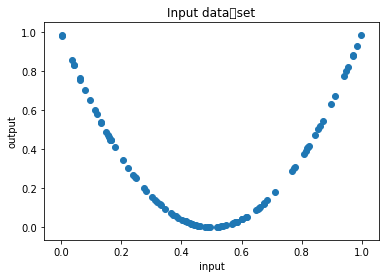

In [16]:
# random seed setting.
random.seed(10,version=2)
xs = np.asarray([random.uniform(0, 1.0) for i in range(100)], dtype=float)
# nomalize 0 to 1.
ys = (xs-0.5)**2*4
plt.scatter(xs, ys)
plt.title("Input data　set")
plt.xlabel("input")
plt.ylabel("output")
plt.show()

---
### モデルの定義
---
モデルを定義します。関数として定義することで若干ながら使い勝手が良くなりますが、誤差の範囲でしょう。
前回のモデルと比べて層が増えました。

In [0]:
def modelBuild():
  model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[1]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
  ])
  model.compile(optimizer='adam', loss='mse')
  model.summary()
  return model

---
### 学習
---
学習については普段どおりに行います。パラメータ数が前回の単純パーセプトロンと比べて多くなり、より複雑な関数を近似することができるようになりました。

今回からミニバッチ学習というものを利用します。これは下のコード内のbatch_size=10と記述されている部分です。今回用いる教師データは100個ありますが、100個を一度に学習させず。10個ずつ10回に分けて学習させます。

今回の場合は、この手法を用いることで誤差関数の勾配が消失し、重みが更新されなくなることを防ぐことができます。

パラメータが増加することで、学習に必要なEpoch数も増加して行きます。そのため、実用上利用可能な複雑なネットワークを学習させる際には非常に長い時間やマシンスペックが必要となってきます。

In [18]:
model = modelBuild()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)
history = model.fit(xs, ys, batch_size=10, epochs=4000, verbose=0, callbacks=[early_stop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


---
### 結果確認
---
学習させたモデルに数値を入力してどのような結果が帰ってくるか確認しましょう。

入力は教師データと同じように0~1までの数値とします。

Text(0.5, 1.0, 'Output data')

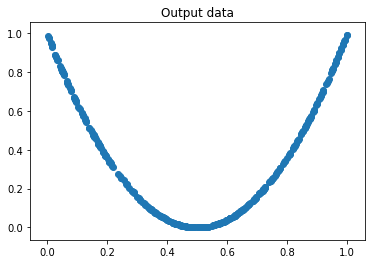

In [19]:
test_data = np.asarray([random.uniform(0, 1.0) for i in range(400)], dtype=float)
test_predict = model.predict(test_data)

plt.scatter(test_data, test_predict)
plt.title("Output data")

可視化すると近似できていそうです。

実際に学習させた範囲外の入力に対してはこのようなグラフになってしまいます。

ここで少し種明かしをしますと、実はこのニューラル・ネットワークで二次関数のような無限大までゆくような関数は近似が難しいです。（というか無限大に発散してしまうようなもの全般の近似は難しい）

そのため、今回の例では入力データ（教師データ）を0~1の範囲に制限しました。

若干コツが要りますが、今回の例でもエポックや層をいじることで学習させることができます。

残念なことにそのような調整に対しての理論は殆どなく、職人技となってしまっているのが実情です。

Text(0.5, 1.0, 'Output data')

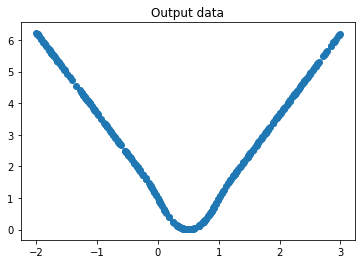

In [20]:
test_data = np.asarray([random.uniform(-2.0, 3.0) for i in range(400)], dtype=float)
test_predict = model.predict(test_data)

plt.scatter(test_data, test_predict)
plt.title("Output data")

もちろん、学習外の入力に対しては残念な結果になります。

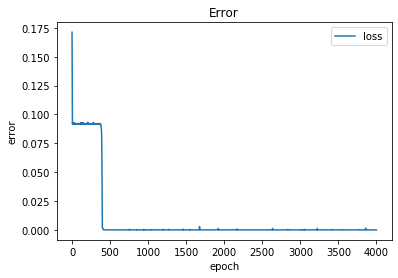

In [21]:
plt.plot(history.history['loss'],label='loss')
plt.ylabel('error')
plt.xlabel('epoch')
plt.title('Error')
plt.legend()
plt.show()

学習曲線を確認すると早い段階で誤差が落ち着いていきます。

難しい話をすると、誤差の勾配がなくなってしまうとそれ以上の学習が進みません。（勾配消失問題）